In [1]:
import pandas as pd

# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
data = pd.read_csv(url, names=column_names, na_values='?')


In [2]:
# Handle missing values
data = data.dropna()

# Convert categorical columns to numeric
data['sex'] = data['sex'].astype(int)
data['cp'] = data['cp'].astype(int)
data['fbs'] = data['fbs'].astype(int)
data['restecg'] = data['restecg'].astype(int)
data['exang'] = data['exang'].astype(int)
data['slope'] = data['slope'].astype(int)
data['ca'] = data['ca'].astype(int)
data['thal'] = data['thal'].astype(int)

# Define features and target
X = data.drop('target', axis=1)
y = data['target']


<ipython-input-2-b978e1229285>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sex'] = data['sex'].astype(int)
<ipython-input-2-b978e1229285>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cp'] = data['cp'].astype(int)
<ipython-input-2-b978e1229285>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.76      0.94      0.84        36
           1       0.00      0.00      0.00         9
           2       0.25      0.20      0.22         5
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         3

    accuracy                           0.58        60
   macro avg       0.20      0.23      0.21        60
weighted avg       0.47      0.58      0.52        60



DATA VISUALISATION

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB
None


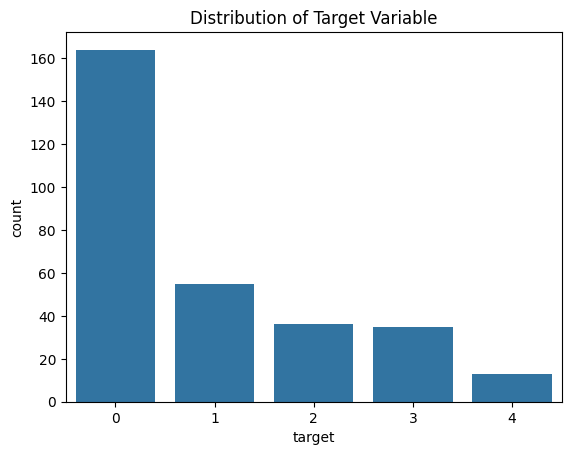

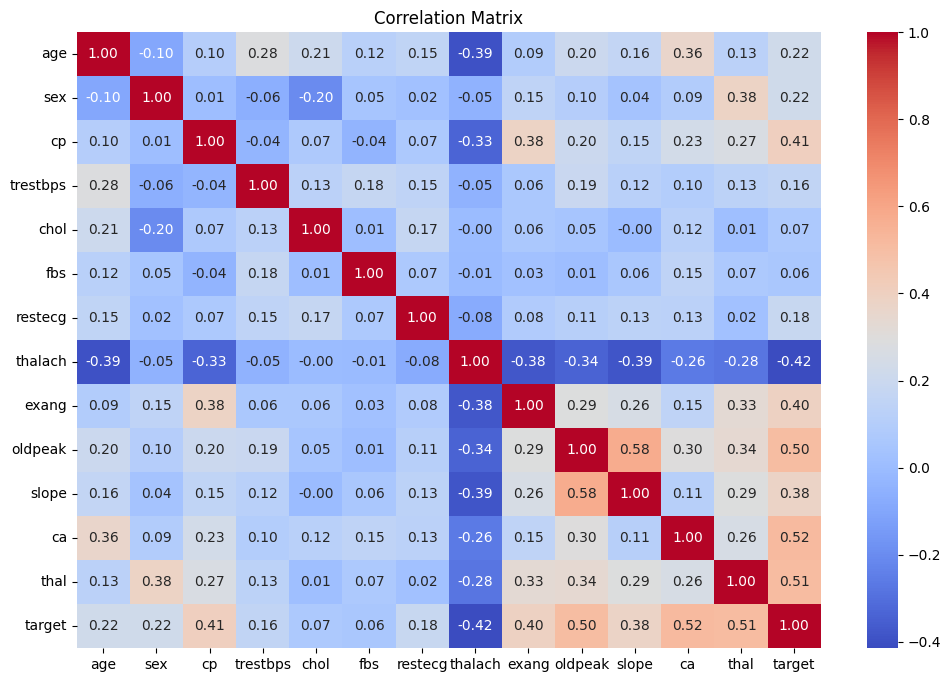

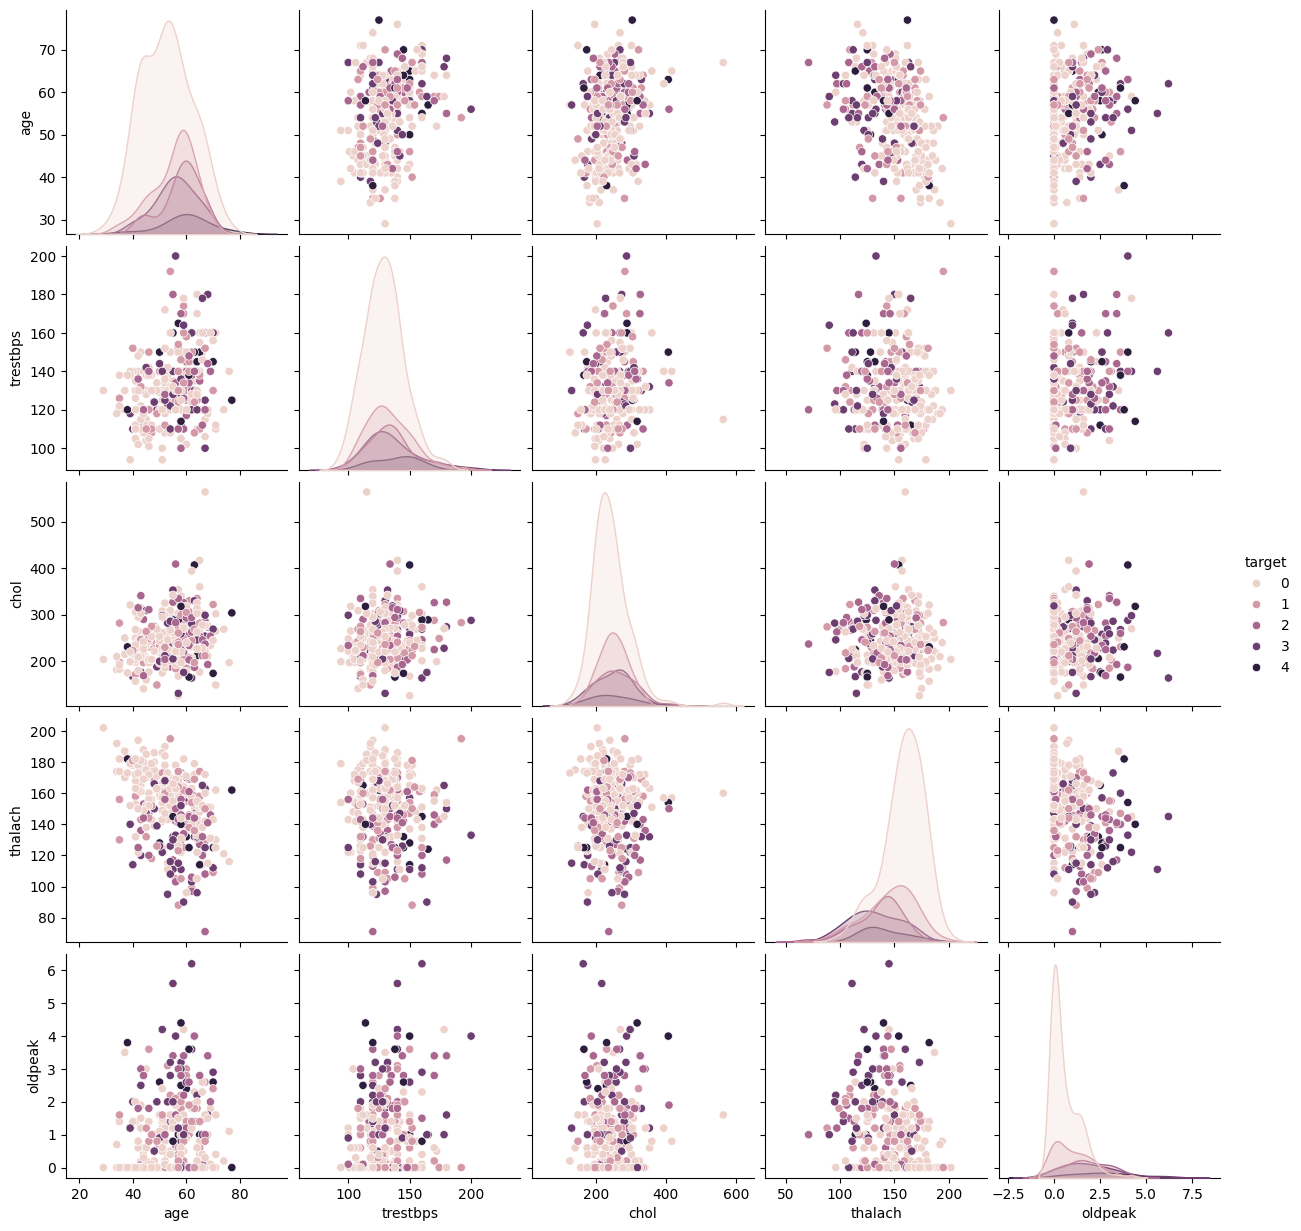

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
data = pd.read_csv(url, names=column_names, na_values='?')

# Display basic information about the dataset
print(data.info())

# Visualize the distribution of target variable
sns.countplot(x='target', data=data)
plt.title('Distribution of Target Variable')
plt.show()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Pairplot for selected features
sns.pairplot(data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']], hue='target')
plt.show()


DATA PROCESSING

In [6]:
# Handle missing values
data = data.fillna(data.mean())

# Convert categorical variables using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['cp', 'restecg', 'slope', 'thal', 'sex', 'fbs', 'exang', 'ca'])

# Split the data into features and target
X = data_encoded.drop(columns=['target'])
y = data_encoded['target']

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


HYPER PARAMETER TUNING

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Cross-Validation Score: 0.6239795918367347


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
219 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

EVALUATE BEST MODEL

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.68      0.97      0.80        29
           1       0.17      0.08      0.11        12
           2       0.20      0.11      0.14         9
           3       0.22      0.29      0.25         7
           4       0.00      0.00      0.00         4

    accuracy                           0.52        61
   macro avg       0.25      0.29      0.26        61
weighted avg       0.41      0.52      0.45        61



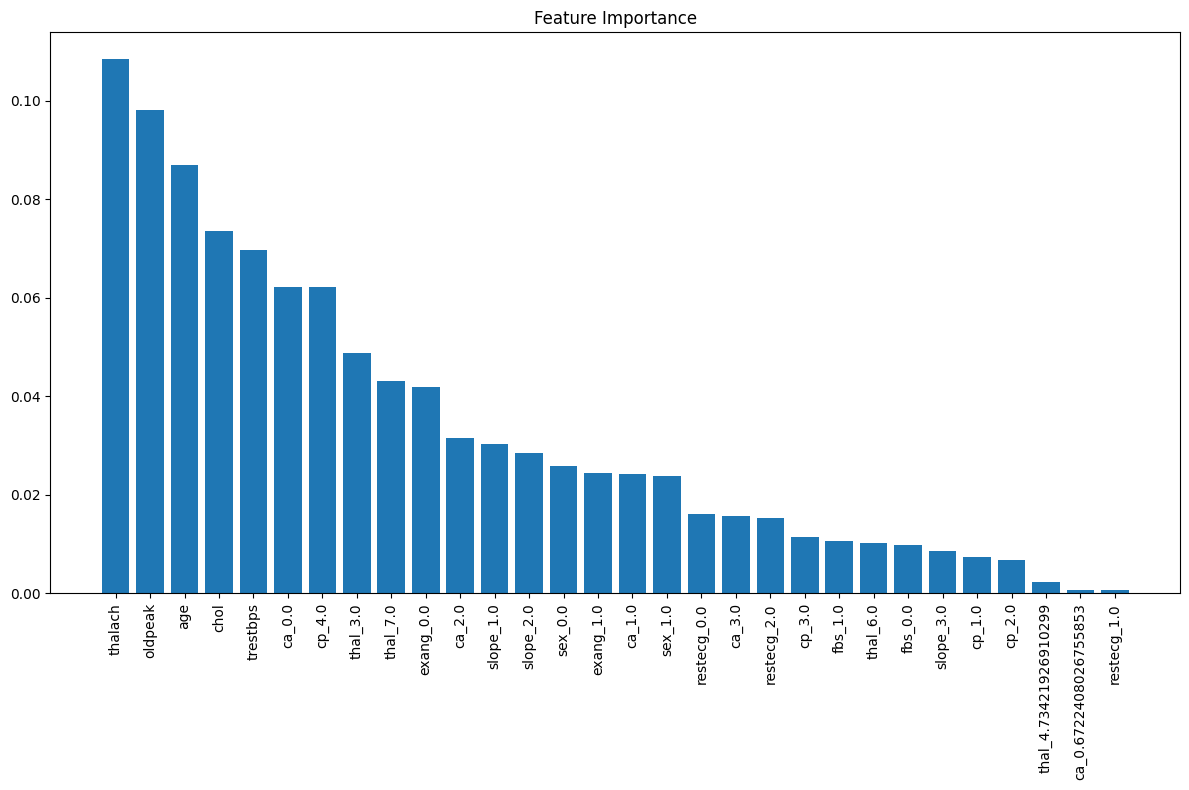

In [10]:
# Use the best estimator to make predictions on the test set
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluate the best model
print(classification_report(y_test, y_pred))

# Visualize feature importance
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importance
plt.figure(figsize=(12, 8))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()


CROSS VALIDATION

In [11]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(best_rf, X, y, cv=10, scoring='accuracy')

# Print the cross-validation scores and mean score
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())


Cross-Validation Scores: [0.67741935 0.58064516 0.61290323 0.6        0.6        0.56666667
 0.46666667 0.56666667 0.56666667 0.6       ]
Mean Cross-Validation Score: 0.5837634408602149


SAVE AND LOAD MODEL

In [20]:
import joblib

# Save the model
joblib.dump(best_rf, 'best_random_forest_model.pkl')

# Load the model
loaded_model = joblib.load('best_random_forest_model.pkl')

# Verify loaded model performance
y_pred_loaded = loaded_model.predict(X_test)
print(classification_report(y_test, y_pred_loaded))


              precision    recall  f1-score   support

           0       0.68      0.97      0.80        29
           1       0.17      0.08      0.11        12
           2       0.20      0.11      0.14         9
           3       0.22      0.29      0.25         7
           4       0.00      0.00      0.00         4

    accuracy                           0.52        61
   macro avg       0.25      0.29      0.26        61
weighted avg       0.41      0.52      0.45        61



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


DEPLOY THE MODEL

In [21]:
import joblib

# Save the model
joblib.dump(best_rf, 'best_random_forest_model.pkl')

# Load the model
loaded_model = joblib.load('best_random_forest_model.pkl')

# Verify loaded model performance
y_pred_loaded = loaded_model.predict(X_test)
print(classification_report(y_test, y_pred_loaded))


              precision    recall  f1-score   support

           0       0.68      0.97      0.80        29
           1       0.17      0.08      0.11        12
           2       0.20      0.11      0.14         9
           3       0.22      0.29      0.25         7
           4       0.00      0.00      0.00         4

    accuracy                           0.52        61
   macro avg       0.25      0.29      0.26        61
weighted avg       0.41      0.52      0.45        61



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RUN

In [22]:
import joblib

# Save the model
joblib.dump(best_rf, 'best_random_forest_model.pkl')

# Load the model
loaded_model = joblib.load('best_random_forest_model.pkl')

# Verify loaded model performance
y_pred_loaded = loaded_model.predict(X_test)
print(classification_report(y_test, y_pred_loaded))


              precision    recall  f1-score   support

           0       0.68      0.97      0.80        29
           1       0.17      0.08      0.11        12
           2       0.20      0.11      0.14         9
           3       0.22      0.29      0.25         7
           4       0.00      0.00      0.00         4

    accuracy                           0.52        61
   macro avg       0.25      0.29      0.26        61
weighted avg       0.41      0.52      0.45        61



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
